# Using KNN (Multi-output classification) for noise removal

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', cache=True)
mnist.target = mnist.target.astype(np.int8)

In [4]:
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [9]:
mnist.data.shape

(70000, 784)

In [23]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [24]:
sort_by_target(mnist)

In [26]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [27]:
y.shape

(70000,)

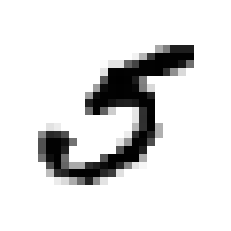

In [28]:
#view the image of a single digit grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

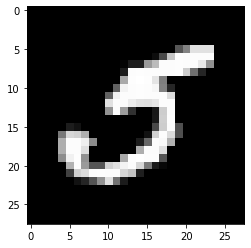

In [29]:
plt.imshow(255-some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

In [30]:
some_digit_image.shape


(28, 28)

In [32]:
X[36000].shape

(784,)

In [33]:
#Split and shuffle data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [34]:
#Adding noise to existing data
import numpy.random as rnd
noise_train = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

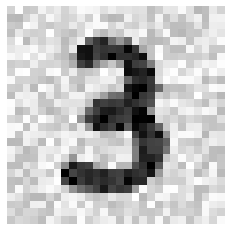

In [35]:
def plot_digit(array):
    array_image = array.reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

plot_digit(X_test_mod[4000])


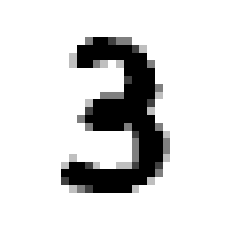

In [36]:
plot_digit(y_test_mod[4000])

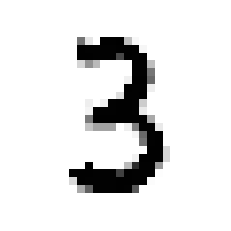

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[4000]])
plot_digit(clean_digit)